# Pymaceuticals Inc.
---

### Analysis

• Ramicane & Capomulin are both effective at treating(reducing) tumor volume with Ramicane showing the best results. 

• Our data found correlation (0.84) in mouse weight and their average tumor volume. This translates to larger tumors for heavier mice.

• Infubinol was the only rdrug thatshowed potential outliersout of the 4 tested. 

• Example of mouse s185 (3-month old female) the Capomulin showed a consistent decrease in tumor size over approxiamtely 45 days.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, how="left", on=['Mouse ID','Mouse ID'])


# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = mouse_df['Mouse ID'].unique()
mouse_count_total = len(mouse_count)
mouse_count_total

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dup = mouse_df.loc[mouse_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mouse_dup

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dup_df = mouse_df.loc[mouse_df["Mouse ID"] == "g989", :]
mouse_dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean_df = mouse_df[mouse_df['Mouse ID'].isin(mouse_dup)==False]
mouse_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_clean_count = mouse_clean_df['Mouse ID'].unique()
mouse_clean_total = len(mouse_clean_count)
mouse_clean_total

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

m_mean = mouse_clean_df['Tumor Volume (mm3)'].groupby(mouse_clean_df['Drug Regimen']).mean()
m_median = mouse_clean_df['Tumor Volume (mm3)'].groupby(mouse_clean_df['Drug Regimen']).median()
m_var = mouse_clean_df['Tumor Volume (mm3)'].groupby(mouse_clean_df['Drug Regimen']).var()
m_std = mouse_clean_df['Tumor Volume (mm3)'].groupby(mouse_clean_df['Drug Regimen']).std()
m_sem = mouse_clean_df['Tumor Volume (mm3)'].groupby(mouse_clean_df['Drug Regimen']).sem()

mouse_summary_df = pd.DataFrame({"Mean Tumor Volume":m_mean, 
                            "Median Tumor Volume":m_median, 
                           "Tumor Volume Variance":m_var, 
                           "Tumor Volume Std. Dev.":m_std, 
                           "Tumor Volume Std. Err.":m_sem})

# Display the Summary statistics table grouped by 'Drug Regimen' column
mouse_summary_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
mouse_summary_ag =  mouse_clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
mouse_summary_ag


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

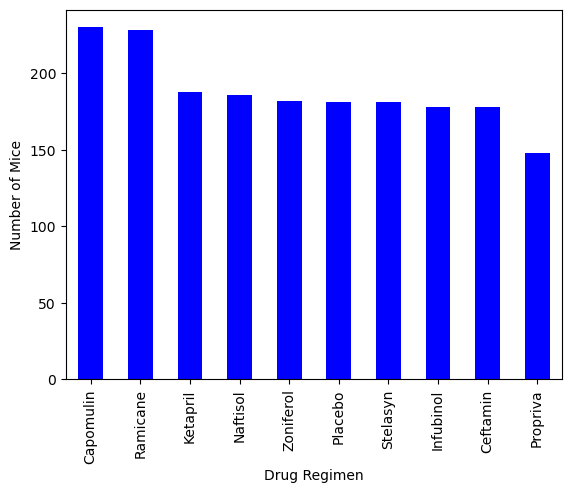

In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# but first, need to group each of the drugs types to plot them

tested_count = mouse_clean_df['Drug Regimen'].value_counts()

plot_bars = tested_count.plot.bar(color='b')  
# Set the xlabel, ylabel, and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

# Save the figure
plt.savefig("Treatedmiceovertime.png")

plot_bars;

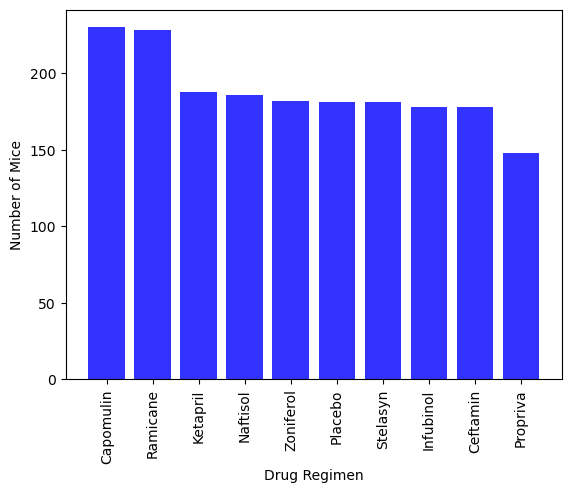

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot. 

x_axis = tested_count.index.values
y_axis = tested_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

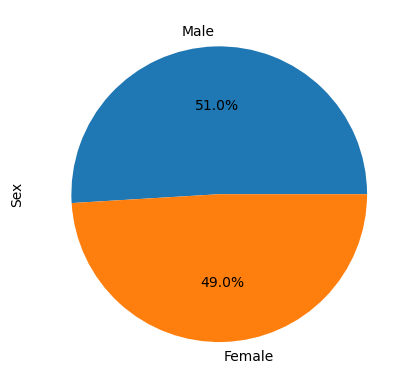

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = mouse_clean_df["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()


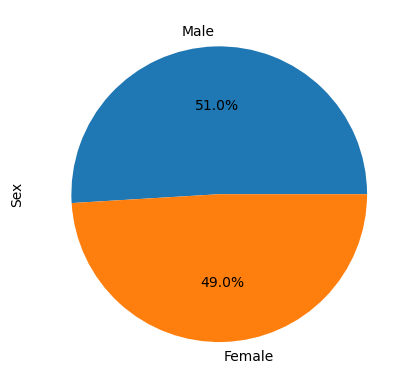

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
sum_vol = mouse_clean_df.groupby(["Mouse ID"])["Timepoint"].max()
sum_vol

# OLD Code: Tightened up with code above - worked with P Ferguson on code:
# Cap_df = mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == "Capomulin",:]
# Ram_df = mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == "Ramicane", :]
# Inf_df = mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == "Infubinol", :]
# Cef_df = mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == "Ceftamin", :]
# Cap_last = Cap_df.groupby('Mouse ID').max()['Timepoint']
# Cap_vol = pd.DataFrame(Cap_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_merged = pd.merge(sum_vol, mouse_clean_df, on=("Mouse ID","Timepoint"),how="left")
tumor_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
t_volume_l= []


for drug in drugs:
 # Locate the rows which contain mice on each drug and get the tumor volumes
    #loc for each time drug is counted and tumor volumes that correlate
    tumorvolume = tumor_merged.loc[tumor_merged["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

    t_volume_l.append(tumorvolume)
    
    quartiles = tumorvolume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
#print outliers
    print(f"For {drug} values below {lower_bound} and above {upper_bound} are outliers.")

#old code: please ignore. Study work with P. Ferguson and improved/shortened with code above, lines 8-24    
#     # if tumor_merged.loc[i, "Drug Regimen"] == "Capomulin":
#     #     t_vol_cap.append(tumor_merged.loc[i, "Tumor Volume (mm3)"])
#     # if tumor_merged.loc[i, "Drug Regimen"] == "Ramicane":
#     #     t_vol_ram.append(tumor_merged.loc[i, "Tumor Volume (mm3)"])
#     # if tumor_merged.loc[i, "Drug Regimen"] == "Infubinol":
#     #     t_vol_inf.append(tumor_merged.loc[i, "Tumor Volume (mm3)"])
#     # if tumor_merged.loc[i, "Drug Regimen"] == "Ceftamin":
#     #     t_vol_cef.append(tumor_merged.loc[i, "Tumor Volume (mm3)"])        
# # Put four tumor vol lists into a list for the for loop
# t_values = [t_vol_cap, t_vol_ram, t_vol_inf, t_vol_cef]
# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
# outliers = []
# for i in range(len(t_values)):
#     quartiles = pd.Series(t_values[i]).quantile([.25,.5,.75])
#     lowerq = quartiles[0.25]
#     upperq = quartiles[0.75]
#     iqr = upperq-lowerq
#     print(f"\n{drugs[i]}:")
#     print(f"The lower quartile of tumor volume is: {lowerq}.")
#     print(f"The upper quartile of tumor volume is: {upperq}.")
#     print(f"The interquartile range of tumor volume is: {iqr}.")
#     print(f"The median of tumor volume is: {quartiles[0.5]}.")
#     lower_bound = lowerq - (1.5*iqr)
#     upper_bound = upperq + (1.5*iqr)
#     print(f"Values below {lower_bound} could be outliers.")
#     print(f"Values above {upper_bound} could be outliers.")
    
#     # Locate the rows which contain mice on each drug and get the tumor volumes
#     # add subset 
#     # Determine outliers using upper and lower bounds
# for j in range(len(t_values[i])):
#         if (t_values[i][j] < lower_bound) or (tumor_vol[i][j] > upper_bound):
#             out_val = tumor_vol[i][j]
#             outliers.append(out_val)
#             print(f"The outliers are {outliers}.")


For Capomulin values below 20.70456164999999 and above 51.83201549 are outliers.
For Ramicane values below 17.912664470000003 and above 54.30681135 are outliers.
For Infubinol values below 36.83290494999999 and above 82.74144559000001 are outliers.
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 are outliers.


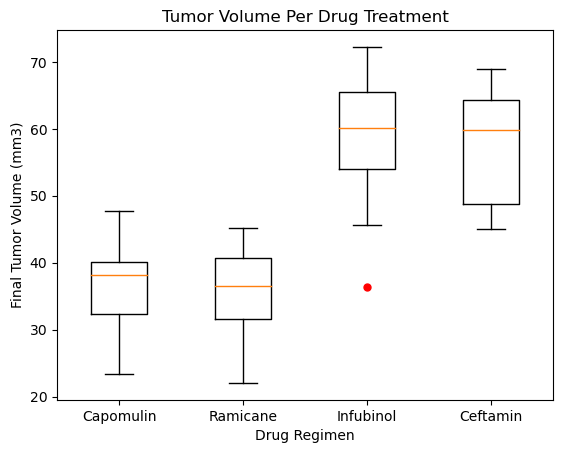

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1,ax1 = plt.subplots()

#custom marker
flierprops = dict(marker='o', markerfacecolor='r', markersize=5,
                  linestyle='none', markeredgecolor='r')
ax1.boxplot(t_volume_l, flierprops=flierprops)

#set labels 
ax1.set_title('Tumor Volume Per Drug Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

#label ticks
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']);

# Save the figure
plt.savefig("Tumorvolumeperdrug.png")

## Line and Scatter Plots

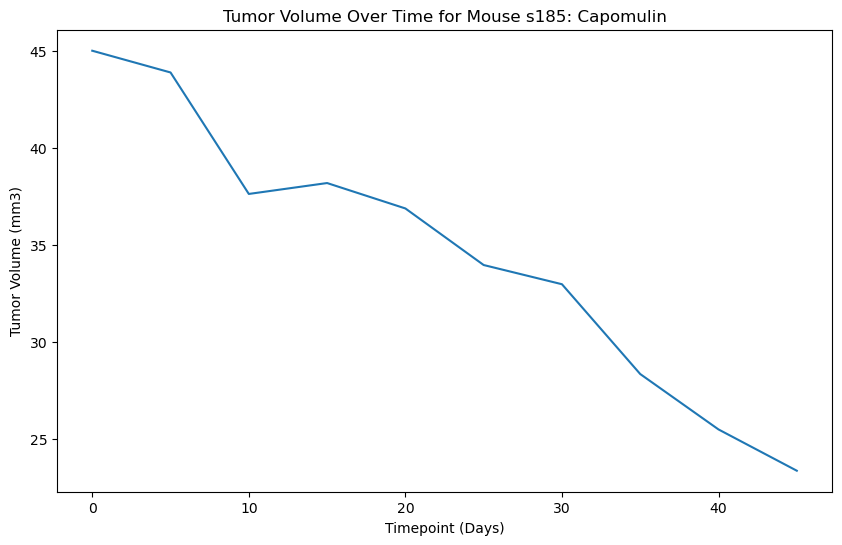

<Figure size 640x480 with 0 Axes>

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_treatment = mouse_clean_df.loc[mouse_clean_df["Drug Regimen"] == "Capomulin"]
cap_treatment

#choose mouse s185 and isolate her data
s185 = mouse_clean_df.loc[mouse_clean_df["Mouse ID"] == "s185"]
s185

fig1,ax1 = plt.subplots(figsize=(10,6))
#make x & y axes
cap_xaxis = s185["Timepoint"]
cap_yaxis = s185["Tumor Volume (mm3)"]
plt.plot(cap_xaxis, cap_yaxis)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Over Time for Mouse s185: Capomulin")
plt.show()

# Save the figure
plt.savefig("Tumorprogress_s185.png")

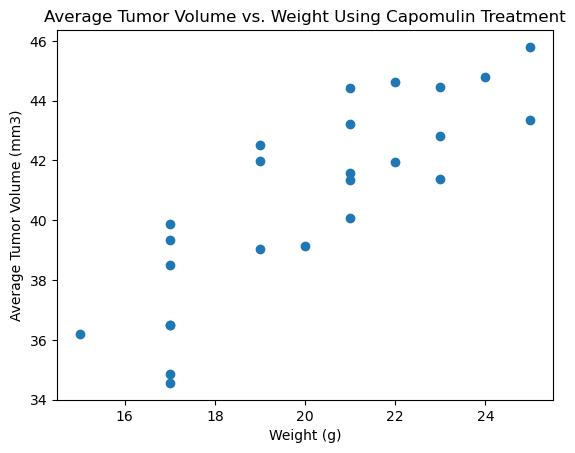

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_cap_weight = cap_treatment.groupby(["Mouse ID"]).mean()
plt.scatter(avg_cap_weight['Weight (g)'], avg_cap_weight['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Weight Using Capomulin Treatment")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.841936342469472
y = 0.95x + 21.55


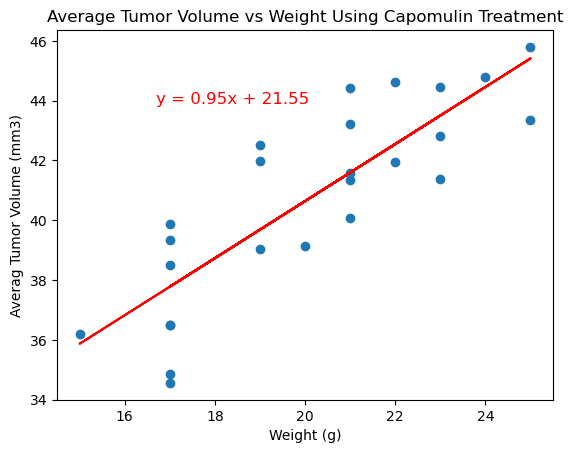

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#find correlation coefficient & print it out
corr_coef = st.pearsonr(avg_cap_weight['Weight (g)'], avg_cap_weight['Tumor Volume (mm3)'])[0] 
#0 cuz first value in output is the statistic, 2nd value is pvalue
print(f"The correlation between mouse weight and average tumor volume is {corr_coef}")

#make scatter plot
plt.scatter(avg_cap_weight['Weight (g)'],avg_cap_weight['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")

#variables for lin regression 
lin_x_values = avg_cap_weight['Weight (g)']
lin_y_values = avg_cap_weight['Tumor Volume (mm3)']

#develop equation
#use built in linregress function to pull our statistical values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lin_x_values, lin_y_values)

#calculate the values on linear regression
regress_values = lin_x_values * slope + intercept

#print out the equation used above
equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(equation)

#add equation & line onto plot
plt.annotate(equation, xy=(20,40), xycoords="data",xytext=(0.2, 0.80), textcoords="axes fraction", fontsize=12,color="red")
plt.plot(lin_x_values,regress_values,"r-")
plt.title("Average Tumor Volume vs Weight Using Capomulin Treatment")
# Save the figure

plt.savefig("Tumorvol_v_mouseweight.png")
plt.show()